<a href="https://colab.research.google.com/github/Manohar7781/Manohar7781/blob/main/Problemstatement_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement - 1:
Description: The objective of this project is to develop a credit card fraud detection system using machine learning techniques. The system aims to identify fraudulent credit card transactions in real-time, providing timely alerts to prevent financial losses for both cardholders and financial institutions.

Dataset Description: The dataset used for this project consists of historical credit card transaction data collected over a specific period. The dataset includes various features related to each transaction, such as transaction amount, timestamp, customer information, merchant details, and other relevant attributes.
The dataset contains a mixture of legitimate transactions and fraudulent transactions. However, it is important to note that fraudulent transactions are relatively rare compared to legitimate transactions, resulting in an imbalanced dataset. This reflects the real-world scenario, where the occurrence of fraud is relatively low.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as style

In [ ]:
df= pd.read_csv("ProblemStatement_1.csv", )
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Feature Engineering
Data Pre-Processing

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum().sum()

0

<ipython-input-60-dce26a4b747d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.V1, )


<Axes: xlabel='V1', ylabel='Density'>

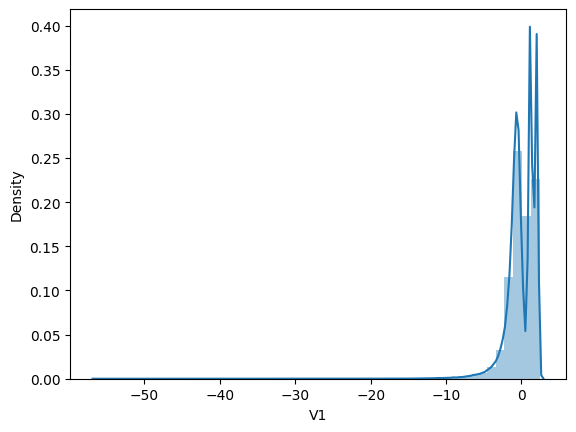

In [ ]:
sns.distplot(df.V1, )

In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Drop Time Attribute

In [ ]:
df.drop('Time', axis=1, inplace=True)

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 29), (284807,))

Normalizing Amountattribute values using StandardScaler

In [ ]:
temp_df = df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
amount = temp_df['Amount'].values
temp_df['Amount'] = standard.fit_transform(amount.reshape(-1,1))
X_scaled = temp_df.drop('Class', axis=1)
y_scaled = temp_df['Class']
X_scaled.shape, y_scaled.shape

((284807, 29), (284807,))

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Exploratoty Data Analysis(EDA) & Visualization.**
Perform exploratory data analysis to gain insights into the dataset, understand the distribution of features, identify any missing or inconsistent data, and visualize patterns or trends.

In [ ]:
class_count_df = pd.DataFrame(df['Class'].value_counts().rename_axis('Class').reset_index(name='Counts'))
class_count_df['Class'].replace({0:'Normal',
                                 1:'Fraud'}, inplace=True)
class_count_df.head()

,Class,Counts
0,Normal,284315
1,Fraud,492


# Bar_Graph

<ipython-input-71-75b29416a0c7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=labels.astype(int), c='black', fontsize=8, fontweight='bold')


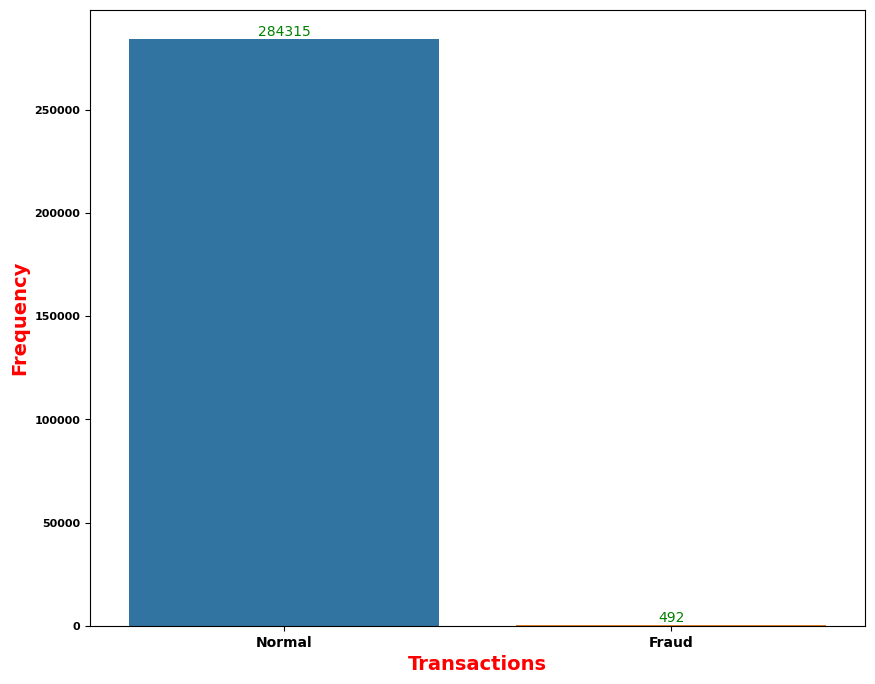

In [ ]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

ax = sns.barplot(x=class_count_df['Class'],
                 y=class_count_df['Counts'])

ax.bar_label(ax.containers[0], color='green') ## Showing Values at top of Each Bar.

ax.set_xticklabels(labels=list(class_count_df['Class']) ,c='black', rotation=0, fontsize=10, fontweight='bold')
labels, location = plt.yticks()
ax.set_yticklabels(labels=labels.astype(int), c='black', fontsize=8, fontweight='bold')

plt.xlabel(xlabel='Transactions', fontsize=14, fontweight='bold').set_color('red')
plt.ylabel(ylabel='Frequency', fontsize=14, fontweight='bold').set_color('red')

In [ ]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]
fraud.shape, normal.shape

((492, 30), (284315, 30))

In [ ]:
fraud_frc = len(fraud)/float(len(df))
fraud_frc

0.001727485630620034

In [ ]:
print(f"Percentage of Fraud Tnx in datasets : {fraud_frc*100:.2f}%")

Percentage of Fraud Tnx in datasets : 0.17%


In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Histogram

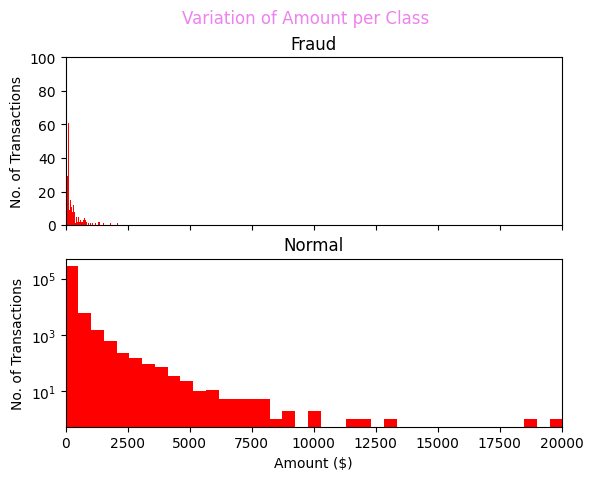

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True)
fig.suptitle("Variation of Amount per Class", color='violet')
bins=50
ax0.hist(fraud['Amount'], bins=bins, color='red')
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(normal['Amount'], bins=bins, color='red')
ax1.set_title('Normal')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

Model Optimization: Fine-tune the selected models by adjusting hyperparameters, applying sampling techniques like oversampling or undersampling to address class imbalance, or using ensemble methods to improve overall performance

# Handling Imbalanced Datasets.
#Oversampling

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
df_majority = df[(df['Class']==0)]
df_minority = df[(df['Class']==1)]

# upsample minority class
df_minority_oversampled = resample(df_minority,
                                 replace=True,
                                 n_samples=284315,
                                 random_state=42)
# Combine majority class with upsampled minority class
df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [ ]:
X_oversampled = df_oversampled.drop('Class', axis=1)
y_oversampled = df_oversampled['Class']
X_oversampled.shape, y_oversampled.shape

((568630, 29), (568630,))

#UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)

X_undersampled, y_undersampled = rus.fit_resample(X, y)
print(f"The number of Classes before the fit {Counter(y)}")
print(f"The number of Classes after the fit {Counter(y_undersampled)}")

The number of Classes before the fit Counter({0: 284315, 1: 492})
The number of Classes after the fit Counter({0: 492, 1: 492})


#SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.

sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data

X_smote, y_smote = sm.fit_resample(df.drop('Class', axis=1),df['Class'])
smote_df = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
X_smote.shape

(568630, 29)

In [ ]:
X_smote.shape

(568630, 29)

In [ ]:
smote_df.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

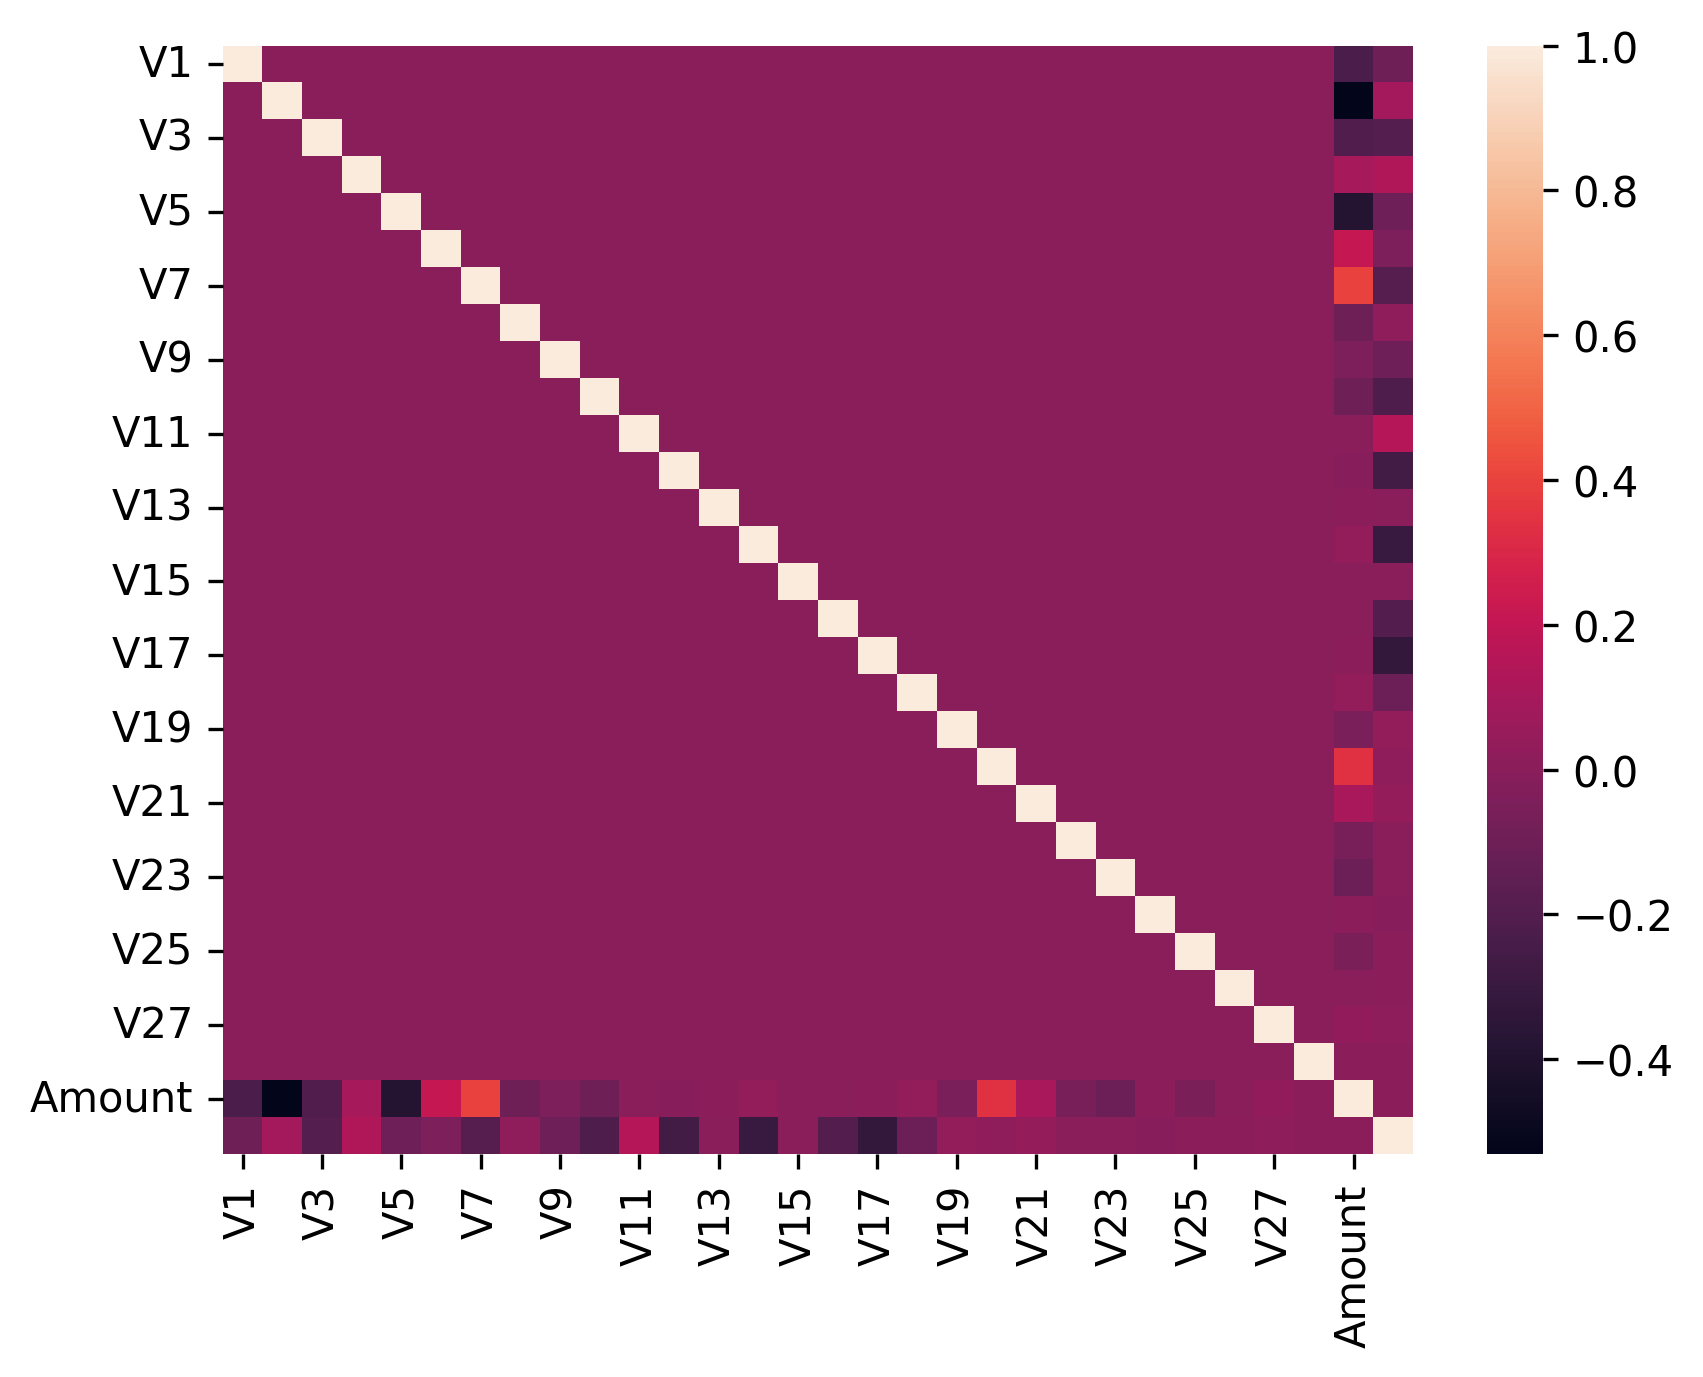

In [ ]:
plt.figure(dpi=300)
sns.heatmap(df[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']].corr())
plt.show()

# Random forest
Model development

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Model Training and Evaluation:
Split the dataset into training and testing sets, and train the selected models using the training data. Evaluate model performance using appropriate evaluation metrics such as accuracy, precision, recall, or F1 score. Given the imbalanced nature of the dataset, consider metrics that account for the trade-off between detecting fraud cases (recall) and minimizing false alarms (precision

In [ ]:
def RF_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")

    print("Model Fitting.....")
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    print("------------Training Prediction--------------")
    y_preds = rf.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix of Training Datasets",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = rf.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix of Testing Datasets",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")


RandomForestClassifier on Normal Datasets.

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.957867%



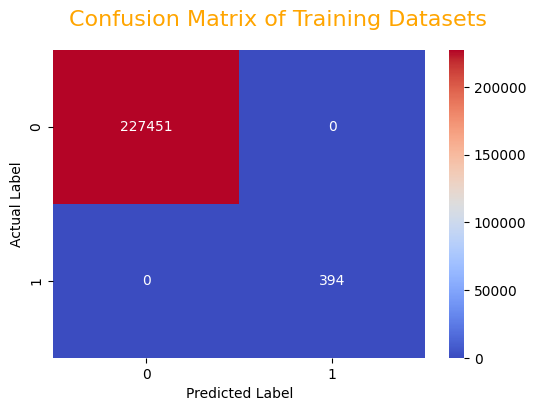

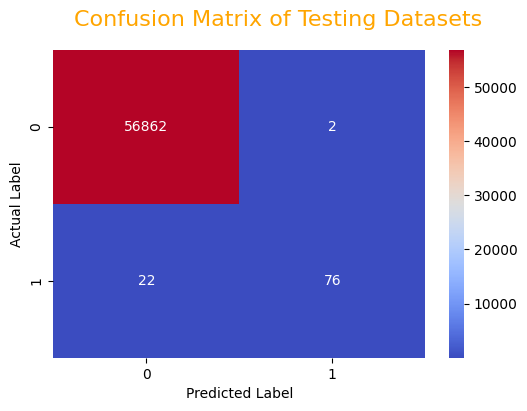

In [ ]:
RF_model(X,y)

RandomForestClassifier on StandardScaled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.957867%



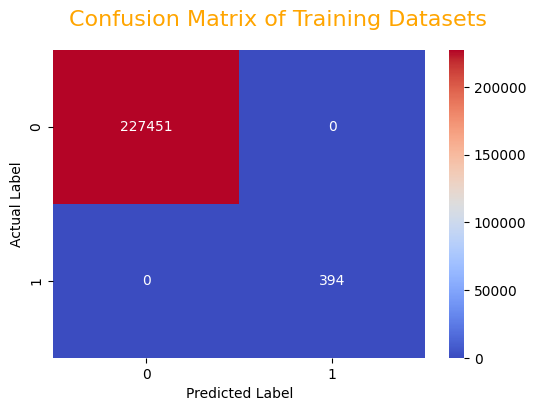

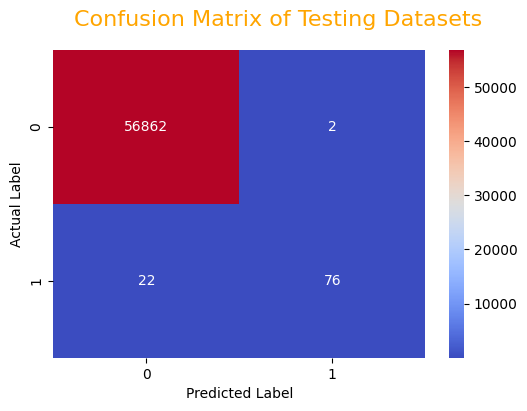

In [ ]:
RF_model(X_scaled,y_scaled)

RandomForestClassifier on Undersampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



Accuracy Score:

92.385787%



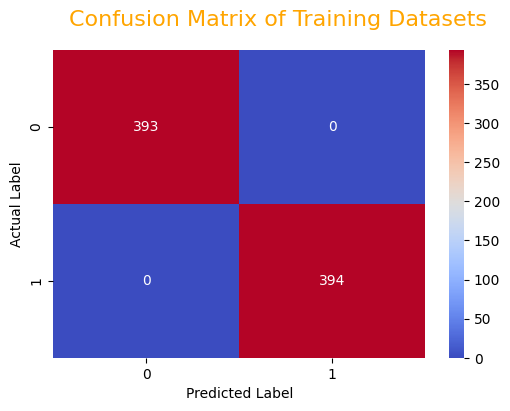

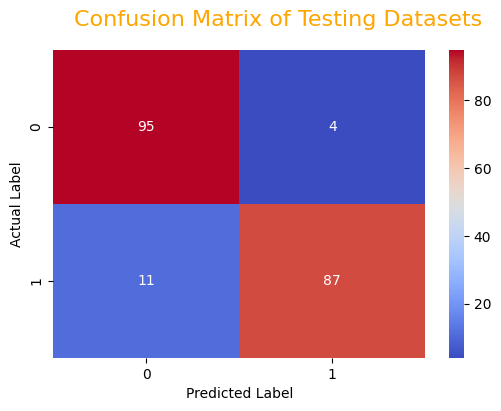

In [ ]:
RF_model(X_undersampled,y_undersampled)

RandomForestClassifier on Oversampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227335
           1       1.00      1.00      1.00    227569

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56980
           1       1.00      1.00      1.00     56746

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Accuracy Score:

99.996483%



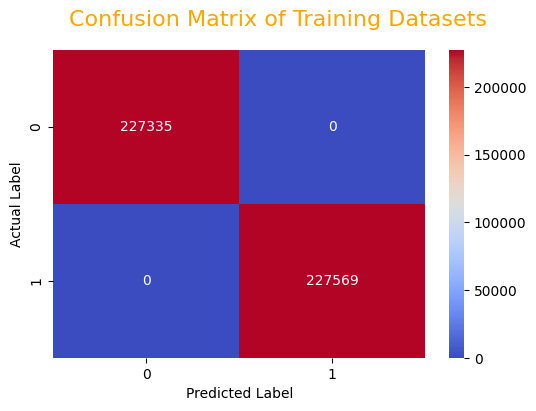

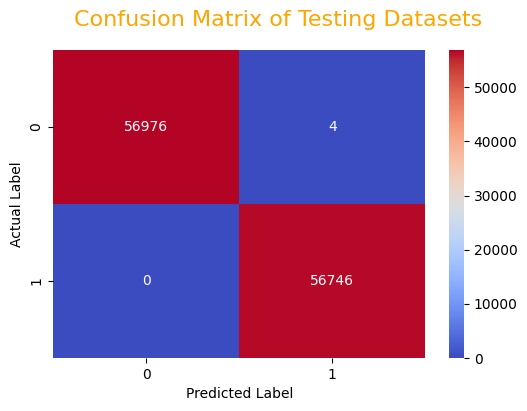

In [ ]:
RF_model(X_oversampled,y_oversampled)

RandomForestClassifier on SMOTE Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Accuracy Score:

99.990328%



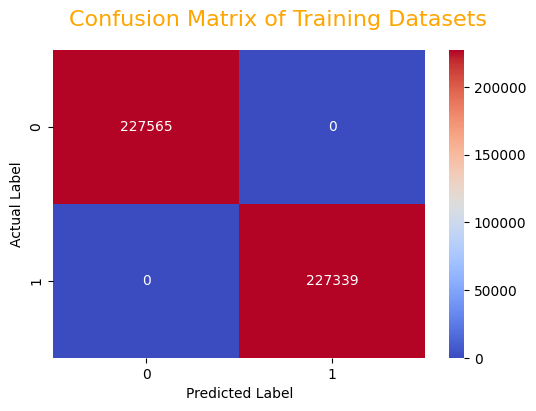

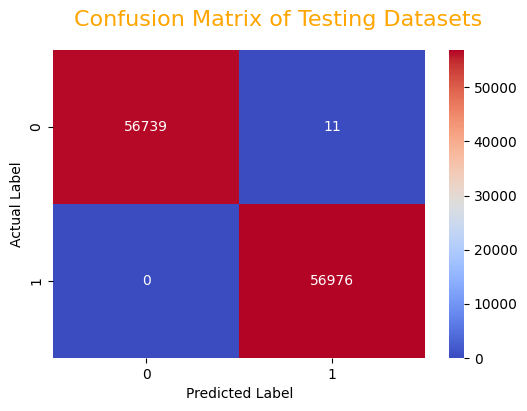

In [ ]:
RF_model(X_smote,y_smote)

 RandomForest works even efficiently for this imbalanced datasets.

Maximum Accuracy of 99.996483%and macro-average of F1-Score of 1.00 acheived with Oversampling technique

Done by
Super Kings Team

Pendli Shanthan Reddy

Gondesi Simha Reddy

Killi Pavan Durga sai Ram

Kampara Manohar


Thank you